In [ ]:
4 EDA
For this probroblem, work with github classroom. Submit the link to your repository on here. Make sure you go through the following three steps.
Find a data set from awesome public datasets which interests you. The data set must have at least 30 rows, and 8 or more attributes (columns). At least 5 of the attributes must be numerical as opposed to categorical (labels). Read through NIST | Exploratory Data Analysis. Produce a jupyter notebooks which does a throughout EDA.
You should have 1-dimensional histograms of each variable of the data. If the data is categorical they will be bar charts. In the accompanying text, report on max, min, mean, median, and outliers. Put all the variables together with a single box plot so we can see them side by side (in addition to the individual histograms).
Next show the pair-wise relationships with a matrix of scatter plots for the numerical data only. How would you show the categorical vs categorical data? Aggregate one variable vs another. How would you show the relationship between categorical and numerical data (color).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Participant_ID             60 non-null     object 
 1   Sleep_Hours                60 non-null     float64
 2   Sleep_Quality_Score        60 non-null     int64  
 3   Daytime_Sleepiness         60 non-null     int64  
 4   Stroop_Task_Reaction_Time  60 non-null     float64
 5   N_Back_Accuracy            60 non-null     float64
 6   Emotion_Regulation_Score   60 non-null     int64  
 7   PVT_Reaction_Time          60 non-null     float64
 8   Age                        60 non-null     int64  
 9   Gender                     60 non-null     object 
 10  BMI                        60 non-null     float64
 11  Caffeine_Intake            60 non-null     int64  
 12  Physical_Activity_Level    60 non-null     int64  
 13  Stress_Level               60 non-null     int64  
d

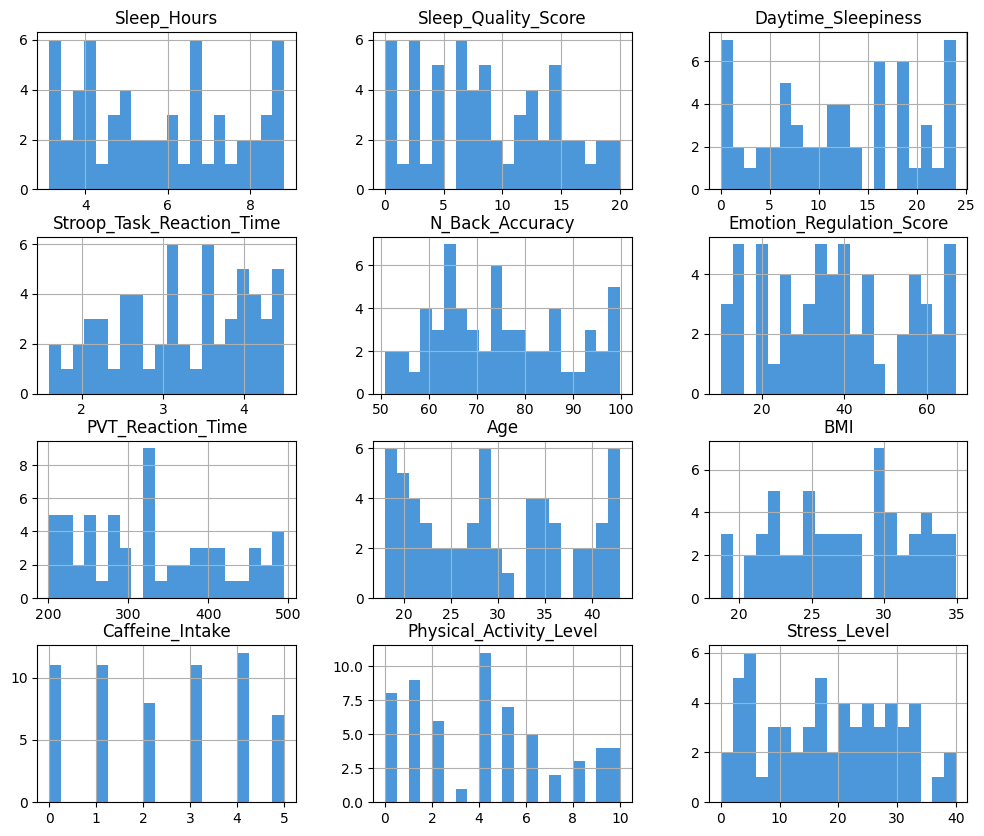

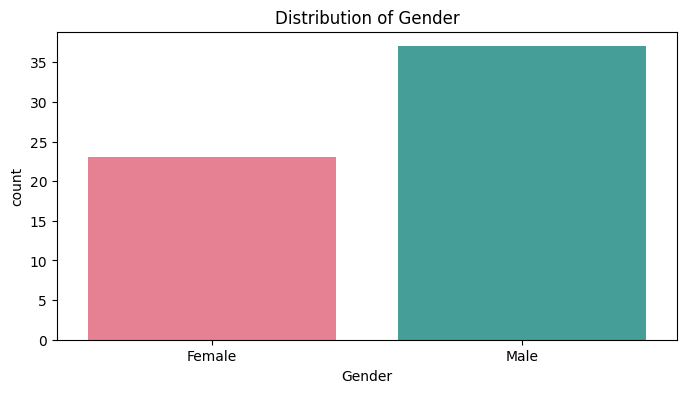

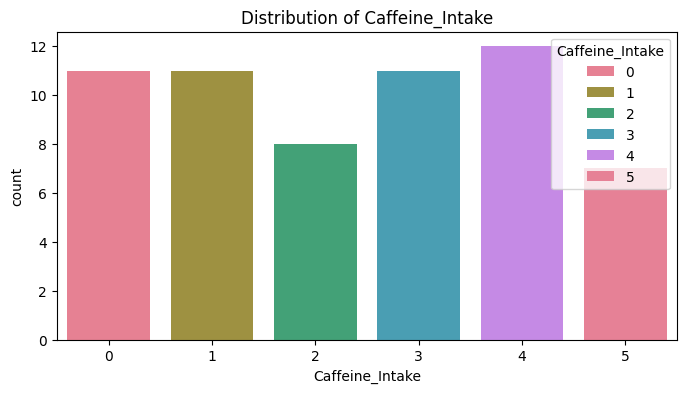

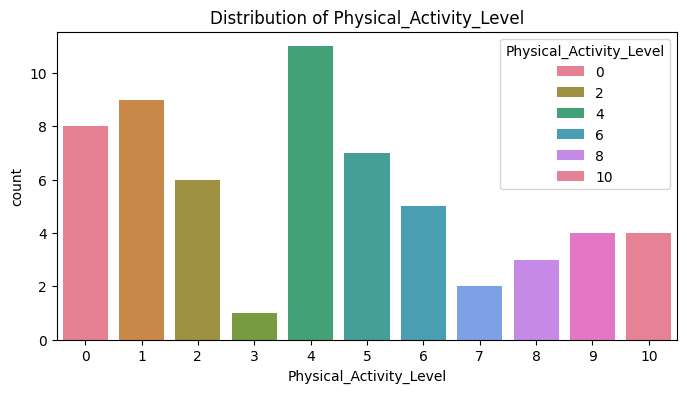

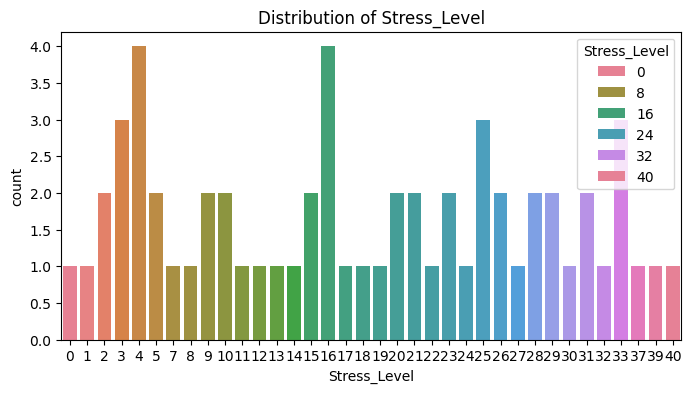

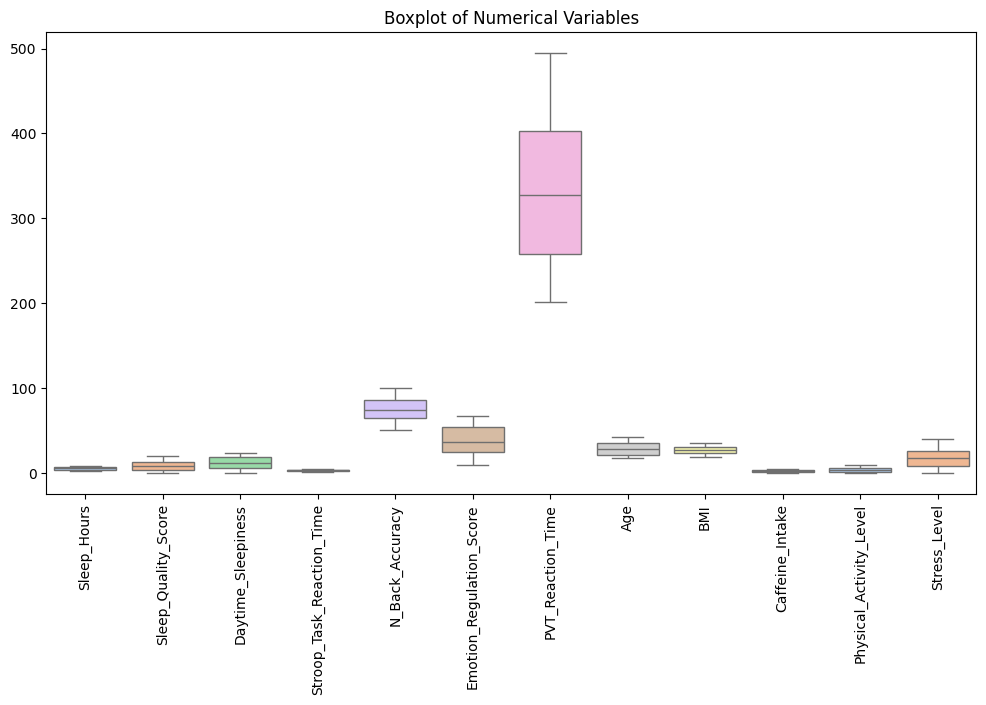

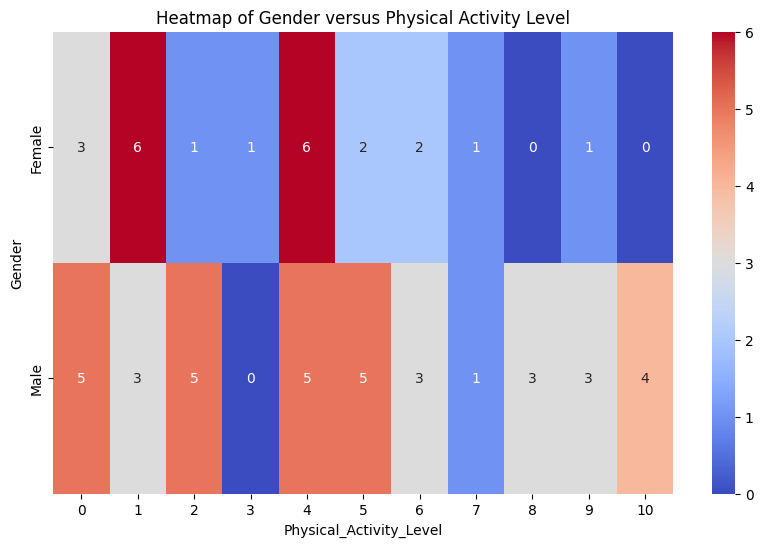

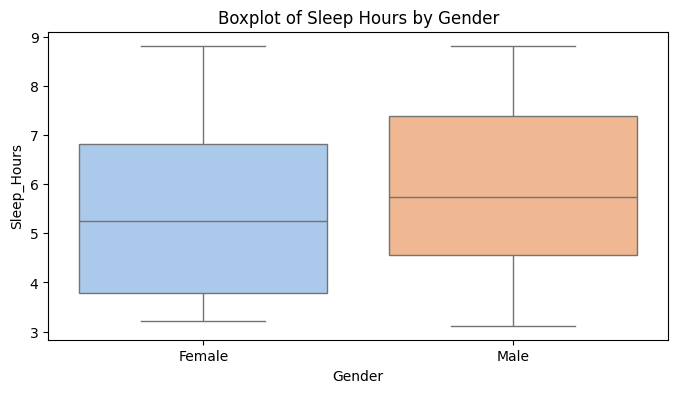

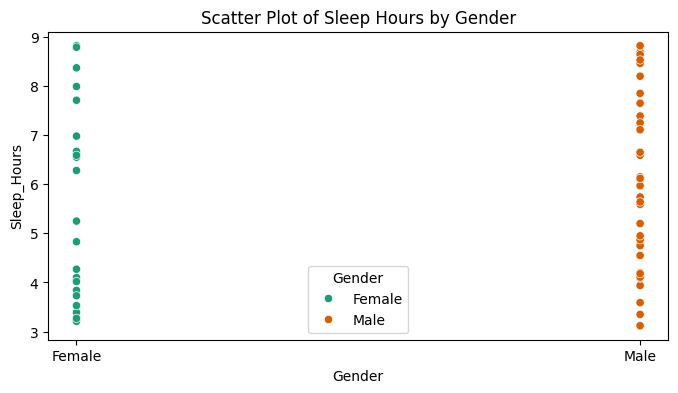

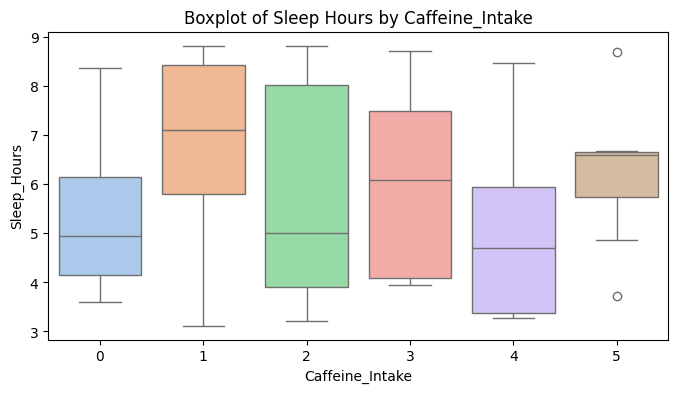

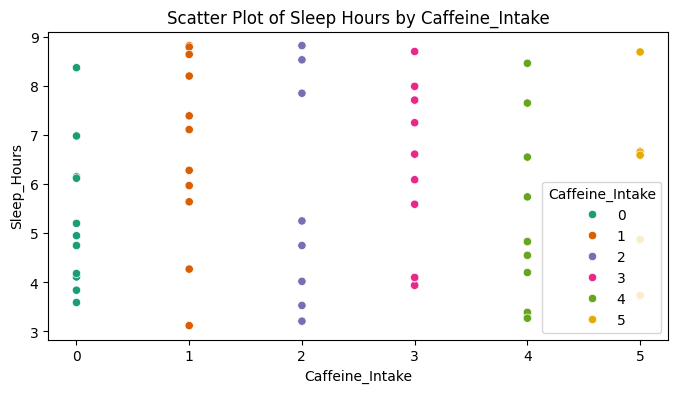

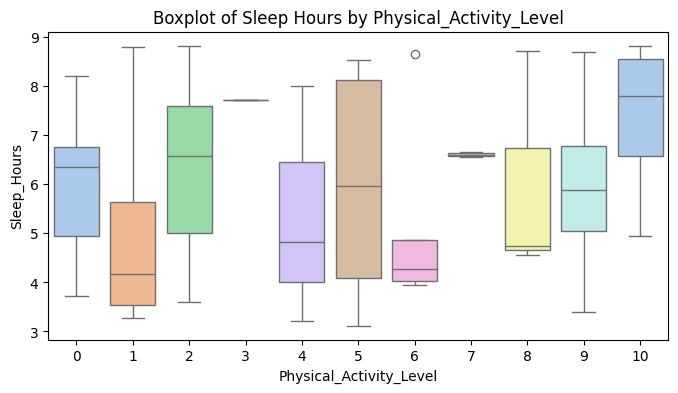

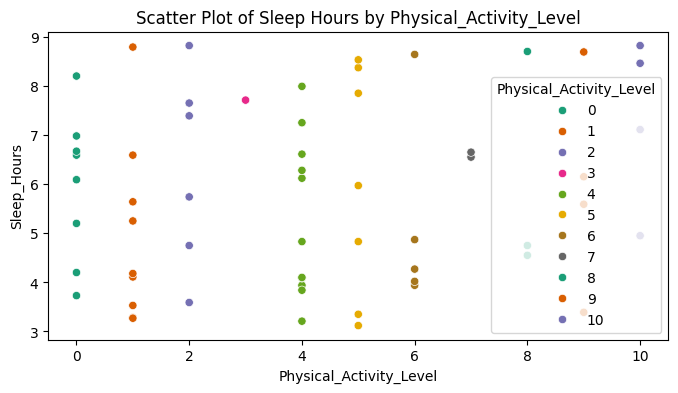

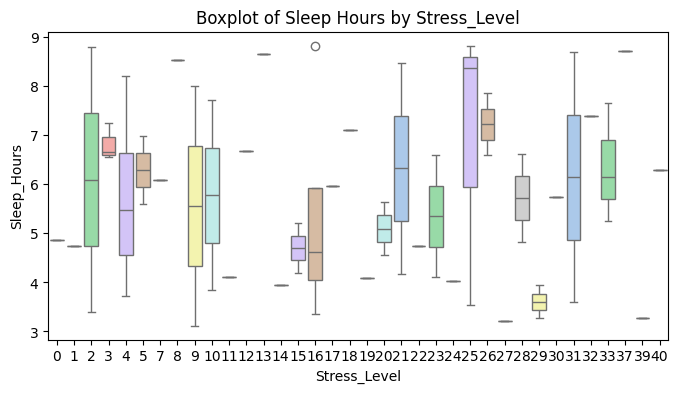

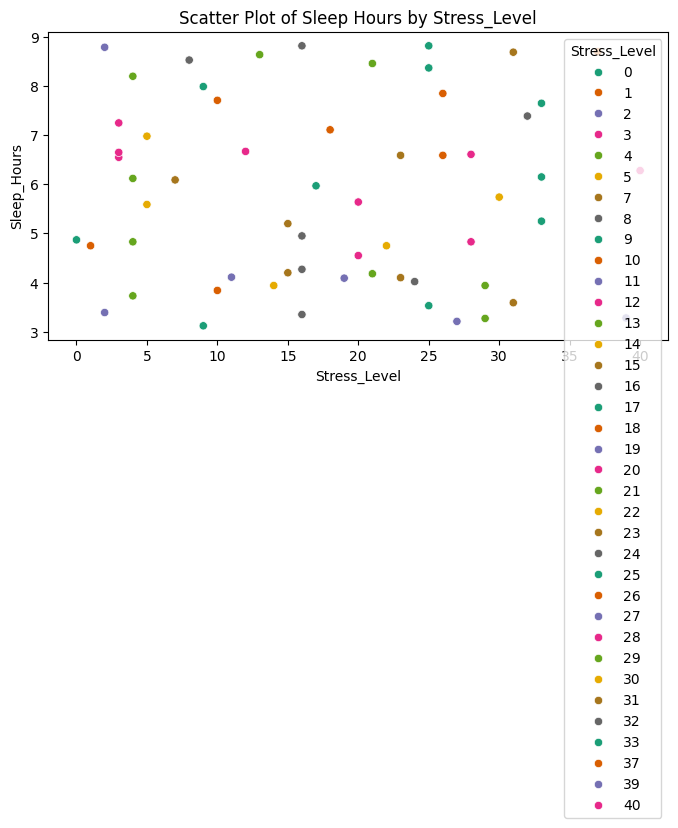

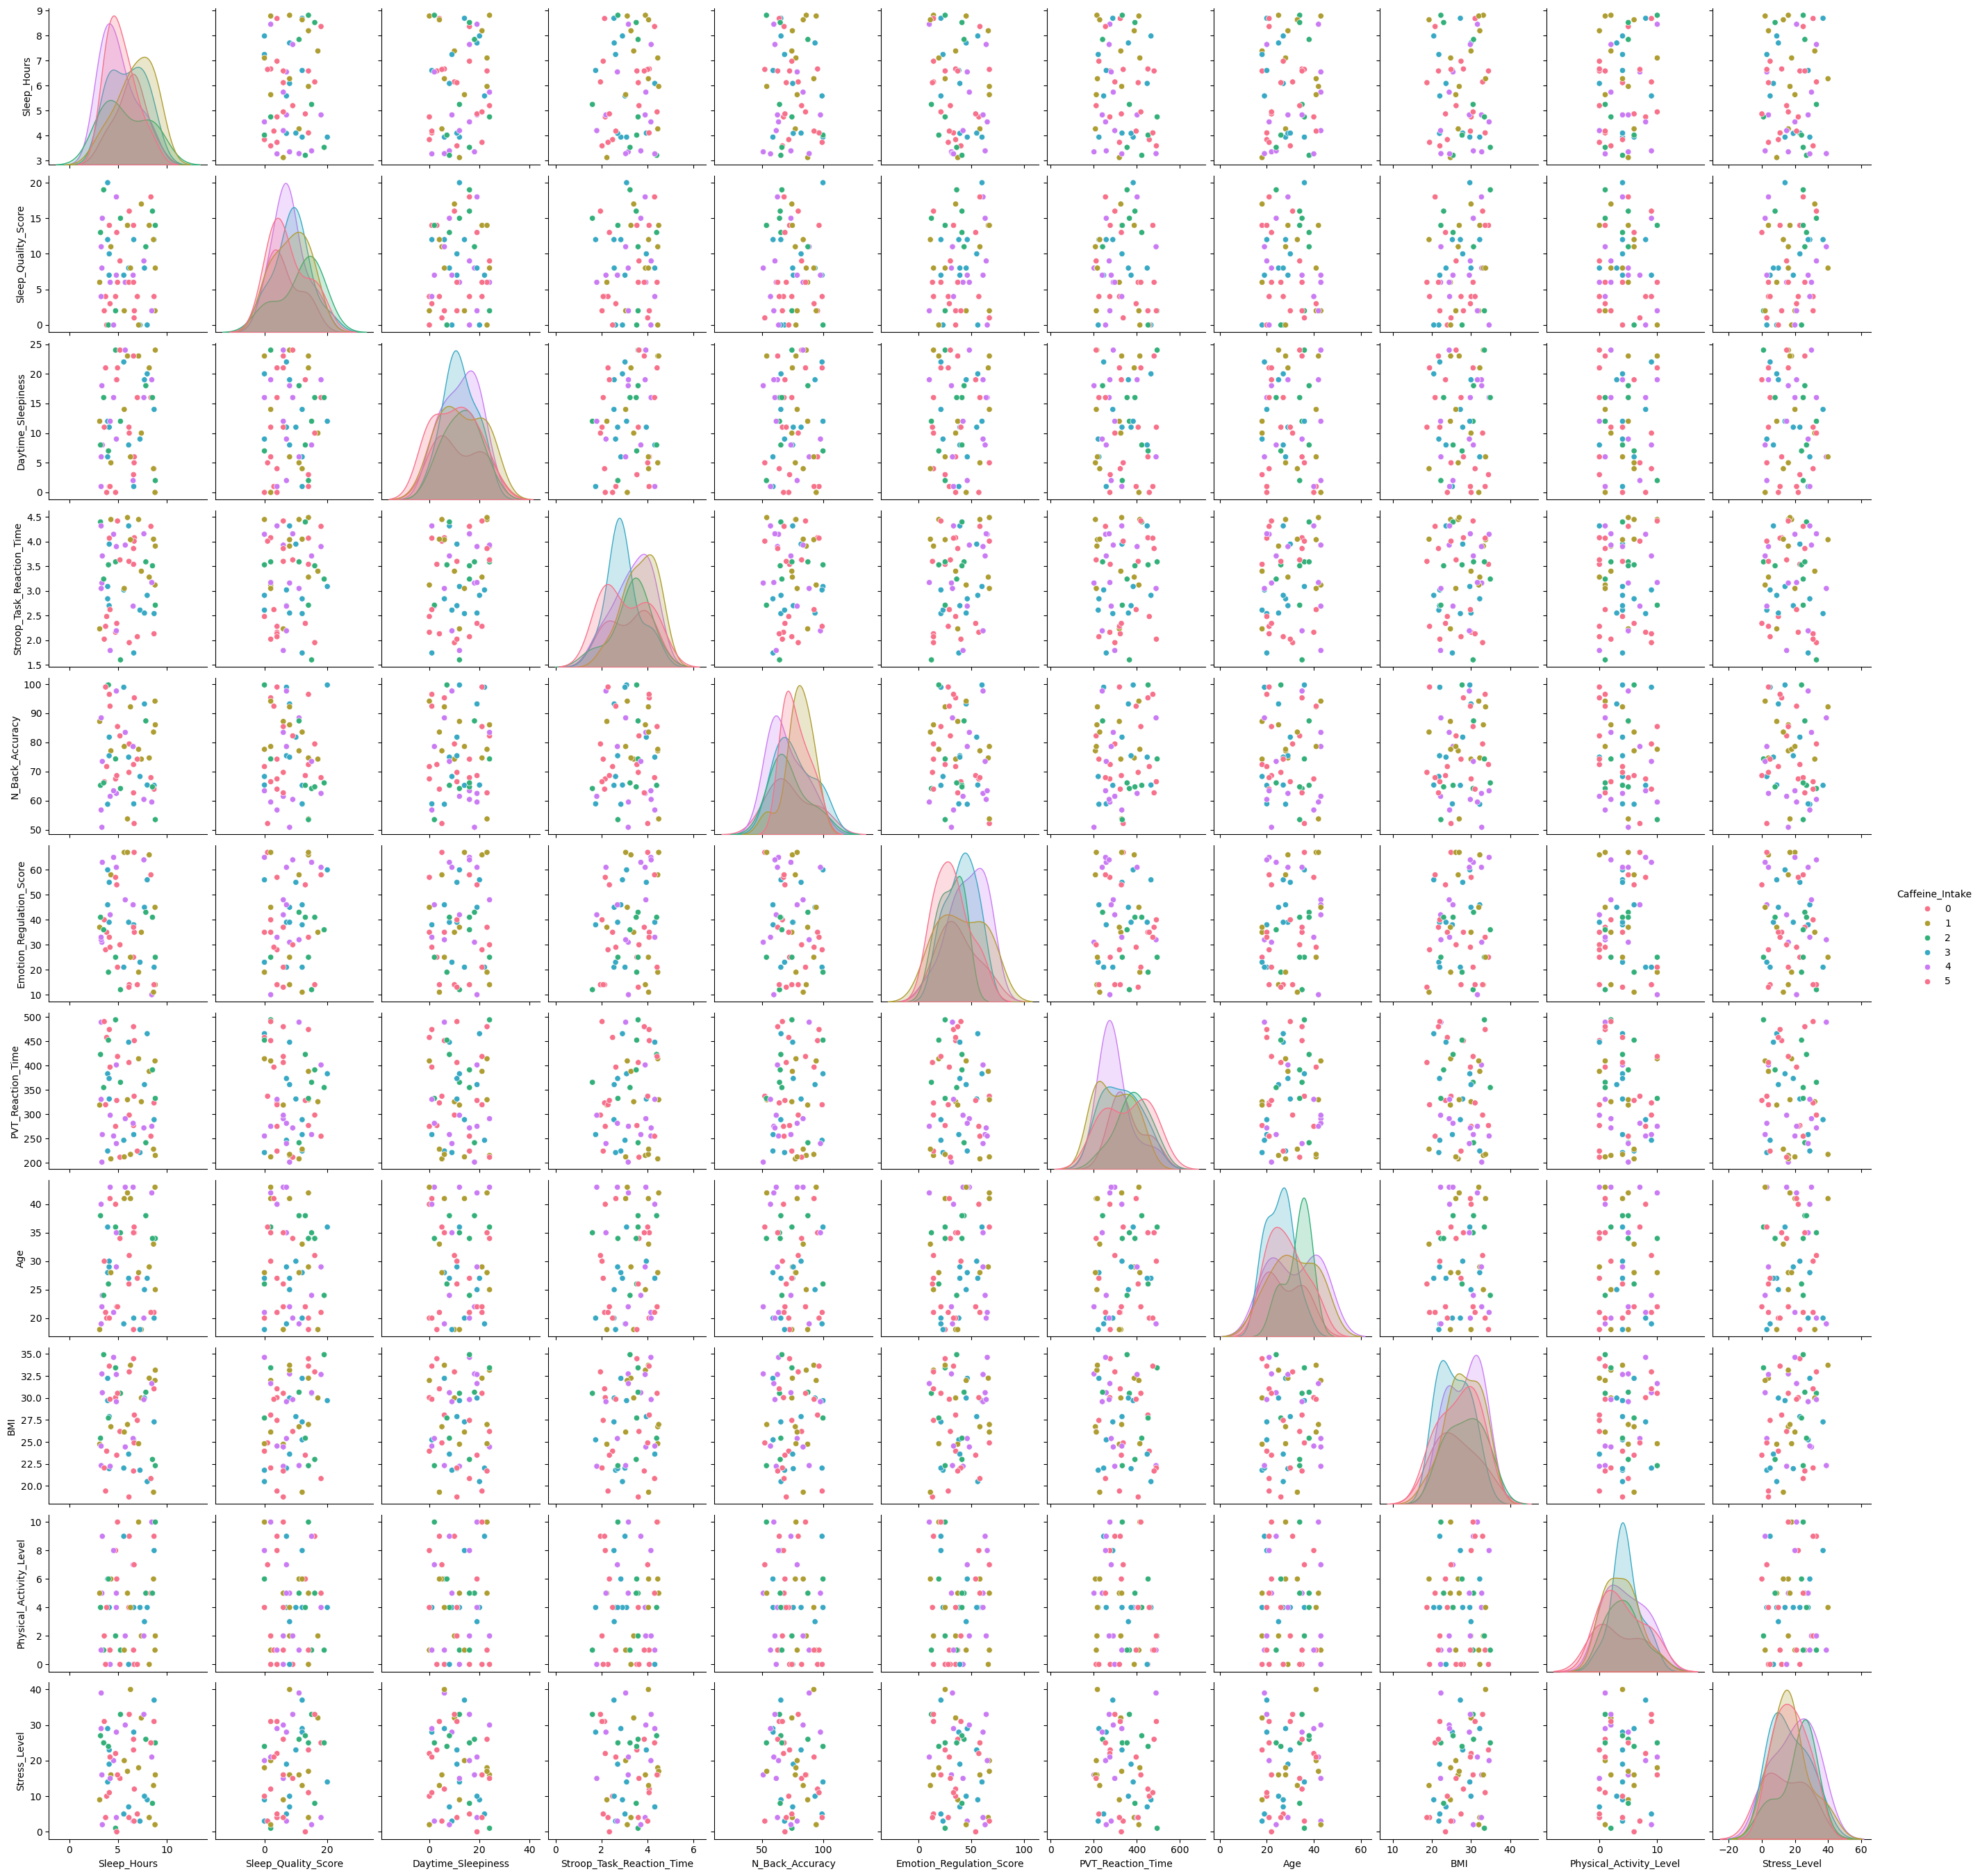

In [62]:
# help from https://medium.com/@techlatest.net/exploratory-data-analysis-with-python-jupyter-notebook-a-tutorial-on-how-to-perform-exploratory-5a800791b04f


import piplite
await piplite.install('seaborn')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn color palette
sns.set_palette("tab10")  # https://seaborn.pydata.org/tutorial/color_palettes.html
# dataset kaggle -
# https://www.kaggle.com/api/v1/datasets/download/sacramentotechnology/sleep-deprivation-and-cognitive-performance
# License CC0: Public Domain
df = pd.read_csv("sleep_deprivation_dataset_detailed.csv")

# Display basic information - In the accompanying text, report on max, min, mean, median, etc.
print(df.info())
print(df.describe())

# You should have 1-dimensional histograms of each variable of the data - Histograms for numerical variables
df.hist(figsize=(12, 10), bins=20, color='#4c97d9')
plt.show()

# Bar charts for categorical variables
categorical_vars = ['Gender', 'Caffeine_Intake', 'Physical_Activity_Level', 'Stress_Level']
for var in categorical_vars:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[var], hue= df[var],palette="husl")  
    plt.title(f"Distribution of {var}")
    plt.show()

# Outlier detection using box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['number']) , palette="pastel",)  
plt.xticks(rotation=90)
plt.title("Boxplot of Numerical Variables")
plt.show()

# Heatmaps for categorical vs categorical relationships
plt.figure(figsize=(10, 6))
corr = pd.crosstab(df['Gender'], df['Physical_Activity_Level'])
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='d')
plt.title("Heatmap of Gender versus Physical Activity Level")
plt.show()

# Put all the variables together with a single box plot so we can see them side by sid - Boxplots and scatter plots for categorical vs numerical data
for var in categorical_vars:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[var], y=df['Sleep_Hours'], hue=df[var], palette="pastel", legend = False)  
    plt.title(f"Boxplot of Sleep Hours by {var}")
    plt.show()
    
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=df[var], y=df['Sleep_Hours'], hue=df[var], palette="Dark2") 
    plt.title(f"Scatter Plot of Sleep Hours by {var}")
    plt.show()

# Next show the pair-wise relationships with a matrix of scatter plots for the numerical data only.  Pairwise scatter plots for numerical data
sns.pairplot(df.select_dtypes(include=['number']),hue= 'Caffeine_Intake', palette="husl")
plt.show()
